<a href="https://colab.research.google.com/github/HrishavSaha/Logistic-Regression-Project/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [ ]:
from google.colab import files
files.upload()

In [14]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from sklearn.linear_model import LogisticRegression
from google.colab import output

Pandas Data Management:

In [3]:
df = pd.read_csv('escape_velocity.csv')
vel = df['Velocity'].tolist()
esc = df['Escaped'].tolist()

Initial Plot:

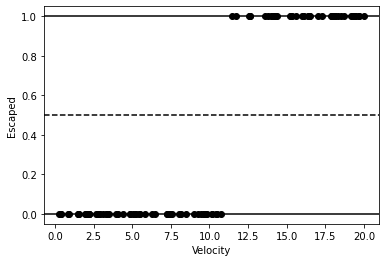

In [4]:
plt.figure()
plt.axhline(y=0, color='k')
plt.axhline(y=1, color='k')
plt.axhline(y=0.5, color='k', linestyle='--')
plt.scatter(vel, esc, color='black')
plt.ylabel('Escaped')
plt.xlabel('Velocity')
plt.show()

Logistic Regression:

In [5]:
#Data Prep
X = np.reshape(vel, (len(vel), 1))
Y = np.reshape(esc, (len(esc), 1))
#Calculating best-fit Linear Regression values
lr = LogisticRegression().fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#Sigmoid Function
def sigfunc(x):
  val = 1/(1+np.exp(-x))
  return val

In [7]:
#Creating dataset and calculating the sigmoid value
res = int(input('Resolution of sigmoid curve(preferably above 500): '))
x_arr = np.linspace(math.floor(min(vel)), math.ceil(max(vel)), res)
lr_x = (lr.coef_ * x_arr) + lr.intercept_
y_arr = sigfunc(lr_x).ravel()

#Locating nearest X Value for Y = 0.5
diff_arr = []
for i in range(len(x_arr)):
  diff = abs(0.5 - y_arr[i])
  diff_arr.append(diff)
X_5 = diff_arr.index(min(diff_arr))
print(X_5)

Resolution of sigmoid curve(preferably above 500): 10000
5664


Plot with Sigmoid Curve:

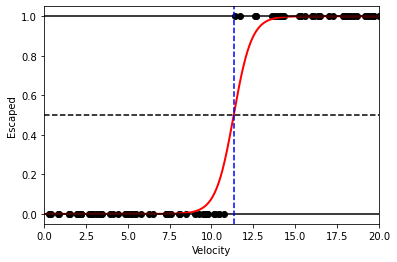

In [8]:
plt.figure()
plt.scatter(vel, esc, color='black')
plt.plot(x_arr, y_arr, color='red', linewidth=2)
plt.axhline(y=0, color='k')
plt.axhline(y=1, color='k')
plt.axhline(y=0.5, color='k', linestyle='--')
plt.axvline(x=x_arr[X_5], color='b', linestyle='--')
plt.ylabel('Escaped')
plt.xlabel('Velocity')
plt.xlim(math.floor(min(vel)), math.ceil(max(vel)))
plt.show()

Logistic Regressional Binary Predictor:

In [17]:
threshold = 0.5

while True:
  user_val = input("Input: ")

  if user_val == 'clear':
    output.clear()
  elif user_val == 'exit':
    break
  else:
    val = float(user_val)
    bin = sigfunc(val*lr.coef_+lr.intercept_).ravel()[0]

    if bin < threshold:
      print('Not Escaped')
      print('Binary: 0')
    else:
      print('Escaped')
      print('Binary: 1')
  print('\n')

Input: 13
Escaped
Binary: 1


Input: 25
Escaped
Binary: 1


Input: exit
